# Convolutional Neural Network

In this project, I will be discussing CNN, the Convolutional Neural Network. This is a network architecture for deep learning that focuses on the processing of data that has a grid pattern, such as images. CNN can also be used for classifying audio, time series, and signal data.

**Some important points to note:**

i.  Convolutional Neural Network Architecture is composed of an input layer, an output layer, and many hidden layers in between.

ii. CNN provides an optimal architecture for uncovering and learning key features in image and time-series data. CNN is a key technology in applications such as Medical Imaging, Object Detection, Audio Processing, and Synthetic Data Generation.

iii. The ability to handle large amounts of data. 

In [1]:
# importing the needed packages
import warnings  # Module to suppress warning                              
warnings.filterwarnings('ignore')   # Never display warnings which match
warnings.simplefilter("ignore")     # Filterwarnings(action, category=DeprecationWarning)

# Pandas and Numpy and math for data manipulation
import pandas as pd
import numpy as np
import math

import sys  # This module gives access to system-specific parameters and functions
import os   # The OS module provides functions for interacting with the operating system

# Matplotlib visualization
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 2)

# interface for neural networks
import tensorflow as tf
from tensorflow import keras 
from keras.models import Model
from keras.models import Sequential
from keras.layers import Dense, Input, Activation
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten
from keras import backend as k

import sklearn
from sklearn.model_selection import train_test_split  # importing the train_test_split() function
from sklearn.preprocessing import LabelEncoder # Module to normalize labels.
from sklearn.metrics import accuracy_score  #  This function computes subset accuracy
import sklearn.metrics as metrics # importing metric functions
from sklearn.metrics import mean_squared_error # estimates the mean squared error for the desired loss unit.
from sklearn.metrics import f1_score # measures test's accuracy
from sklearn.metrics import precision_score # classifier not to label as positive a sample that is negative 
from sklearn.metrics import recall_score  # measures model’s ability to correctly predict the positives out of actual positives
from sklearn.metrics import confusion_matrix # matrix to evaluate the accuracy of a classification.
from sklearn import model_selection
from sklearn.metrics import classification_report

In [2]:
from sklearn.datasets import fetch_openml
mnist_data = fetch_openml('mnist_784', version=1, as_frame=False)

In [3]:
mnist_data.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
X, y = mnist_data["data"], mnist_data["target"]
X.shape

(70000, 784)

In [5]:
view_y = mnist_data["target"]
view_y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [6]:
y.shape

(70000,)

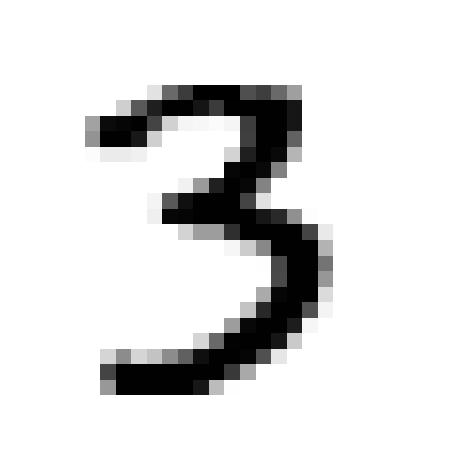

In [7]:
# A quick look at one of the image
plt.figure(figsize=(8,8))
image = X[10000]
image_out = image.reshape(28, 28)
plt.imshow(image_out, cmap=mpl.cm.binary)
plt.axis("off")
plt.show()

In [8]:
# Normalizing the data
X = X / 255.0
print("X shape: ",X.shape)

X shape:  (70000, 784)


In [9]:
# Reshaping the data.
X = X.reshape(-1,28,28,1)
print("X shape: ", X.shape)

X shape:  (70000, 28, 28, 1)


In [10]:
from keras.utils.np_utils import to_categorical 
y = to_categorical(y, num_classes = 10)

In [11]:
print("y shape: ",y.shape)

y shape:  (70000, 10)


In [12]:
# Splitting Dataset
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42) 

In [13]:
# Viewing the shape of the data.
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(56000, 28, 28, 1) (14000, 28, 28, 1) (56000, 10) (14000, 10)


In [14]:
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
model = Sequential()
model.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [15]:
# Define the optimizer
from tensorflow.keras.optimizers import Adam
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

In [16]:
# Compile the model
model.compile(optimizer = optimizer , loss = "mean_squared_error", metrics=["accuracy"])

In [17]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 8)         208       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 8)        0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 8)         0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 16)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 16)          0

In [18]:
from keras.preprocessing.image import ImageDataGenerator
# data augmentation to reduce overfitting
data = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=5,  # randomly rotate images in the range 5 degrees
        zoom_range = 0.1, # Randomly zoom image 10%
        width_shift_range=0.1,  # randomly shift images horizontally 10%
        height_shift_range=0.1,  # randomly shift images vertically 10%
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

data.fit(X_train)

In [19]:
epochs = 25 
batch_size = 250

In [20]:
%%time
# Fit the model
history = model.fit_generator(data.flow(X_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_test,y_test),  
                              steps_per_epoch=X_train.shape[0] // batch_size)

Epoch 1/25
224/224 [==============================] - 12s 50ms/step - loss: 0.0428 - accuracy: 0.6795 - val_loss: 0.0077 - val_accuracy: 0.9503
Epoch 2/25
224/224 [==============================] - 12s 52ms/step - loss: 0.0171 - accuracy: 0.8863 - val_loss: 0.0052 - val_accuracy: 0.9664
Epoch 3/25
224/224 [==============================] - 12s 52ms/step - loss: 0.0129 - accuracy: 0.9146 - val_loss: 0.0043 - val_accuracy: 0.9726
Epoch 4/25
224/224 [==============================] - 11s 51ms/step - loss: 0.0107 - accuracy: 0.9303 - val_loss: 0.0039 - val_accuracy: 0.9745
Epoch 5/25
224/224 [==============================] - 11s 50ms/step - loss: 0.0093 - accuracy: 0.9390 - val_loss: 0.0033 - val_accuracy: 0.9787
Epoch 6/25
224/224 [==============================] - 11s 51ms/step - loss: 0.0084 - accuracy: 0.9450 - val_loss: 0.0031 - val_accuracy: 0.9788
Epoch 7/25
224/224 [==============================] - 11s 50ms/step - loss: 0.0080 - accuracy: 0.9476 - val_loss: 0.0029 - val_accuracy:

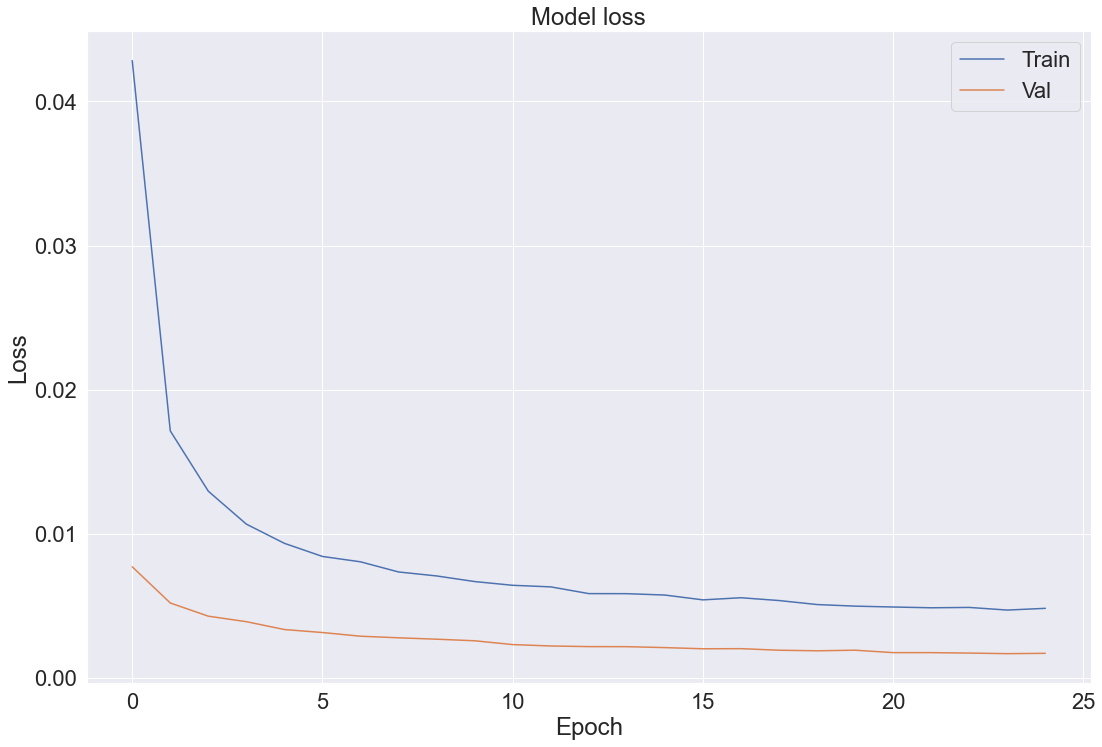

In [21]:
# visualize the training loss and the validation loss to see if the model is overfitting
fig = plt.figure(figsize = (18, 12))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

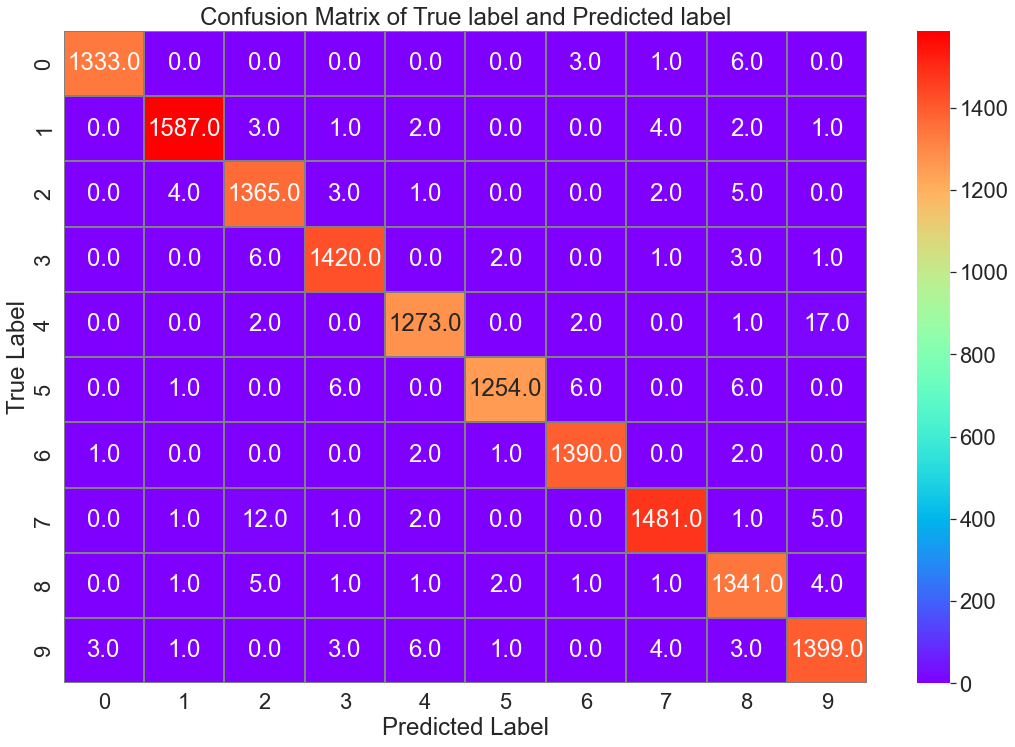

In [22]:
# Predicting the values from the validation dataset
y_pred = model.predict(X_test)
# Convert predictions classes to one hot vectors 
y_pred_class = np.argmax(y_pred,axis = 1) 
# Convert validation observations to one hot vectors
y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
con_mx = confusion_matrix(y_true, y_pred_class) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(18, 12))
sns.heatmap(con_mx, annot=True, linewidths=0.01,cmap="rainbow",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix of True label and Predicted label")
plt.show()

In [23]:
# classification report
target_names = ['class 0', 'class 1', 'class 2', 'class 3', 'class 4', 'class 5', 'class 6', 'class 7', 'class 8', 'class 9']
print(classification_report(y_true, y_pred_class, target_names=target_names))

              precision    recall  f1-score   support

     class 0       1.00      0.99      0.99      1343
     class 1       0.99      0.99      0.99      1600
     class 2       0.98      0.99      0.98      1380
     class 3       0.99      0.99      0.99      1433
     class 4       0.99      0.98      0.99      1295
     class 5       1.00      0.99      0.99      1273
     class 6       0.99      1.00      0.99      1396
     class 7       0.99      0.99      0.99      1503
     class 8       0.98      0.99      0.98      1357
     class 9       0.98      0.99      0.98      1420

    accuracy                           0.99     14000
   macro avg       0.99      0.99      0.99     14000
weighted avg       0.99      0.99      0.99     14000



In [24]:
#Accuracy Score
print("Accuracy on val sample is: %f" %(accuracy_score(y_true, y_pred_class)))

Accuracy on val sample is: 0.988786


## Test the model
We will now test the model on some random test data set. We will first construct the image of the number from the test data and then run our classifier to verify if it could identify it correctly.


8
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


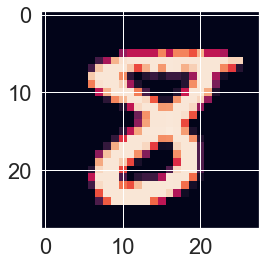

In [25]:
y_pred_test = model.predict(X_test)
y_pred_class_test = np.argmax(y_pred_test,axis = 1)

image = X_test[0].reshape( 28, 28)
plt.imshow(image)
print(y_pred_class_test[0])
y_true_test = np.argmax(y_test,axis = 1)
print(y_test[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


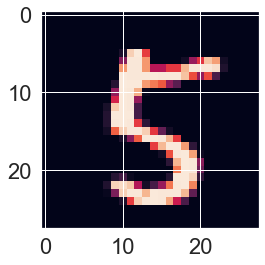

In [26]:
i = 120
image = X_test[i].reshape( 28, 28)
plt.imshow(image)
print(y_pred_class_test[i]) 
print(y_test[i])

From the above examples the model is getting the right prediction on test data.
There is almost **99% accuracy** on both **validation** and **test** dataset.